In [1]:
#plot h,g,e for 2 valued (binary)

x=[]
y=[]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pi=0.1
h = -pi*np.log2(pi)
print(h)

0.33219280948873625


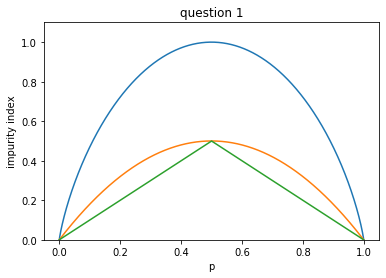

In [4]:
#question1
x=np.arange(0.000001,1.0,0.0001)
def ent(x):
    return -x*np.log2(x)-(1-x)*np.log2((1-x))

def gini(x):
    return x*(1-x)+(1-x)*(1-(1-x))

def class_error(p):
    return 1-np.max([p,1-p])

plt.plot(x,ent(x))
plt.plot(x,gini(x))
plt.plot(x,[class_error(i) for i in x])
plt.ylim([0,1.1])
plt.xlabel('p')
plt.ylabel('impurity index')
plt.title('question 1')
plt.show()

In [5]:
x=[0.1,0.2,0.3]
pi=x[0]
h = -pi*np.log2(pi)
h

0.33219280948873625

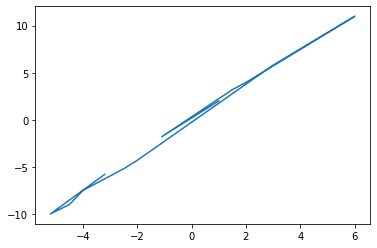

In [6]:
#question2
x1=[1,-1.1,1.5,2.05,6.01,3,-2,-2.5,-4,-4.5,-5.2,-3.2]
x2=[2,-1.8,3.2,4.05,11,5.8,-4.3,-5.2,-7.5,-9,-10,-5.8]
plt.plot(x1,x2)

In [7]:
import statistics 
import scipy.linalg as la 
m_x1=statistics.mean(x1)
m_x2=statistics.mean(x2)
print(m_x1,m_x2)
x1_new=[i-m_x1 for i in x1]
x2_new=[i-m_x2 for i in x2]

cov_mat=np.cov(x1_new,x2_new)
# import scipy
print(cov_mat)
# print(m_x1,m_x2,c_x1,c_x2)
[eigval_mat,eigvec_mat] = la.eig(cov_mat)
print(eigval_mat)
print(eigvec_mat)

-0.7450000000000001 -1.4625
[[11.90020909 22.74343182]
 [22.74343182 43.57051136]]
[2.22640022e-02+0.j 5.54484565e+01+0.j]
[[-0.88639606 -0.46292766]
 [ 0.46292766 -0.88639606]]


In [8]:
#question 3
#cal eucledian, minchowski, jacart-similarity,cosine sim,manhatten


In [9]:
import numpy as np
import math
from decimal import Decimal

def euclidean_distance(x,y):
    return math.sqrt(sum(math.pow(a-b,2) for a,b in zip(x,y)))

def manhatten(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))

# def minchowski(x,y):
#     return 



def nth_root(value,n_root):
    return pow(value,1.0/n_root)
def minchowski(x,y,p_val):
    return nth_root(sum(pow(abs(a-b),p_val) for a,b in zip(x,y)),p_val)

def square_rooted(x):
    return round(math.sqrt(sum([a*a for a in x])),3)
def cos_sim(x,y):
    numerator=sum(a*b for a,b in zip(x,y))
    denominator=square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

def jaccard_similarity(x,y):
    intersec_cardinality = len(set.intersection(*[set(x),set(y)]))
    union_card = len(set.union(*[set(x),set(y)]))
    return intersec_cardinality/float(union_card);

x=[1,1]
y=[2,2]
print(euclidean_distance([4,5],[3,-1]))
print(manhatten([10,20],[20,20]) )   
print(minchowski([4,5],[3,-1],1))
print(cos_sim([3,45,7,2],[2,54,13,15]))
print(jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

6.082762530298219
10
7.0
0.972
0.375


In [10]:
#question 4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
iris = datasets.load_iris()
print(iris.data.shape)

(150, 4)


In [11]:
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris['species'] = iris.target_names[iris.target]
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df_iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

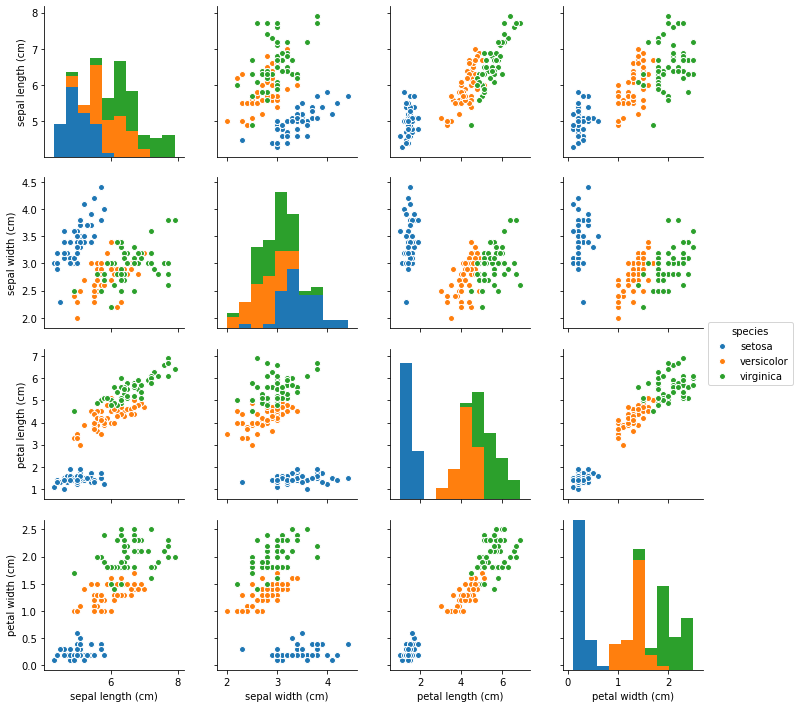

In [13]:
sns.pairplot(df_iris,hue='species')

In [14]:
m = np.array([df_iris['petal length (cm)'].mean(),df_iris['petal width (cm)'].mean()])
print(m)

[3.758      1.19933333]


No handles with labels found to put in legend.


   petal length (cm)  petal width (cm)
0             -2.358         -0.999333
1             -2.358         -0.999333
2             -2.458         -0.999333
3             -2.258         -0.999333
4             -2.358         -0.999333
covariance matrix [[3.11627785 1.2956094 ]
 [1.2956094  0.58100626]]
[3.66123805 0.03604607] [[ 0.92177769 -0.38771882]
 [ 0.38771882  0.92177769]]


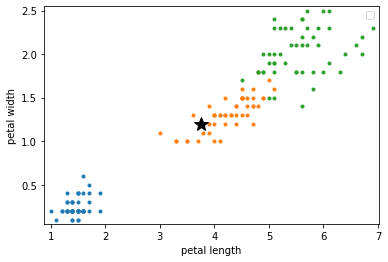

In [15]:
plt.legend(loc=0)
plt.margins(0.02)
plt.xlabel('petal length')
plt.ylabel('petal width')

for key,group in df_iris.groupby(['species']):
    plt.plot(group['petal length (cm)'],group['petal width (cm)'],label=key,marker='.',linestyle='none')

plt.plot(m[0],m[1],marker='*',color='black',markersize=15,linestyle='none',label='mean')

df_centered = df_iris.loc[:,['petal length (cm)','petal width (cm)']]
for col in df_centered.columns:
    df_centered[col] -= df_centered[col].mean()

print(df_centered.head())

cov_mat = np.cov(df_centered.transpose())
print('covariance matrix',cov_mat)

eig_vals,eig_vecs = np.linalg.eig(cov_mat)

print(eig_vals,eig_vecs)

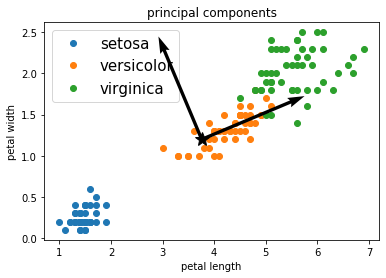

In [16]:
for key,group in df_iris.groupby(['species']):
    plt.plot(group['petal length (cm)'],group['petal width (cm)'],label=key,marker='o',linestyle='None')
    
plt.legend(loc=0,fontsize=15)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('principal components')
    
plt.plot(m[0],m[1],marker='*',color='black',markersize=15)
plt.quiver([m[0]]*2,[m[1]]*2,eig_vecs[:,1],eig_vecs[:,0],zorder=11,width=0.01,scale=3)


pca 1 : 99.03%of the variance
pca 2 : 0.97%of the variance



KeyError: 'species'

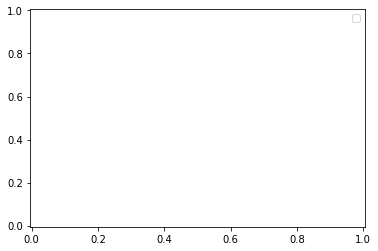

In [17]:
print("""
pca 1 : {0:.2f}%of the variance
pca 2 : {1:.2f}%of the variance
""".format(*tuple(eig_vals/np.sum(eig_vals)*100)))
df_1D = pd.DataFrame(np.dot(df_iris.loc[:,['petal length (cm)',
                                            'petal width (cm)']],eig_vecs[:,0]),columns=['projection'])
plt.margins(0.005)
plt.legend(np.array(['setosa','versicolor','virginica']))

for key,group in df_1D.groupby(['species']):
    plt.plot(group['projection'],np.zeros_like(group['projection']),alpha=0.4,label=key,marker='o')